In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load winequality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

In [4]:
# Split data into training and testing sets
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train linear SVM model
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Print classification report
y_pred = linear_svm.predict(X_test)
print("Linear SVM")
print(classification_report(y_test, y_pred))

Linear SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.78      0.68       130
           6       0.52      0.61      0.56       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.46      0.57      0.51       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


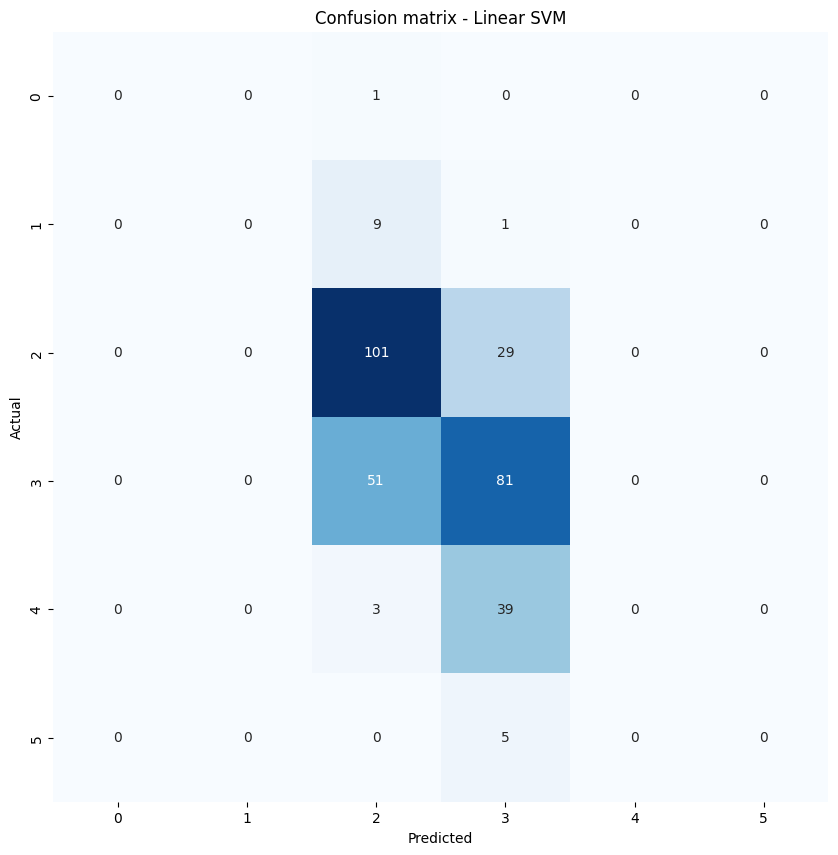

In [7]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Linear SVM')
plt.show()


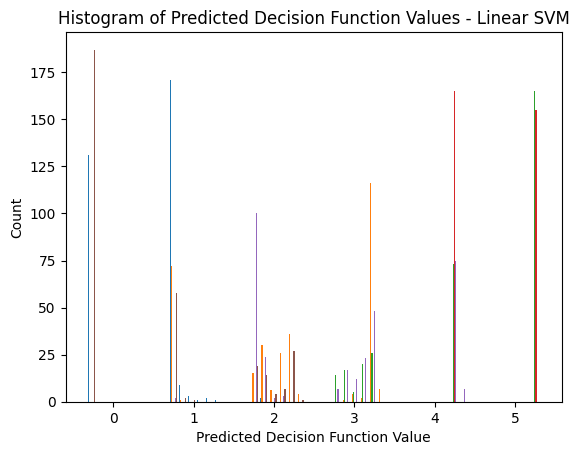

In [8]:
# Plot histogram of predicted class probabilities
proba = linear_svm.decision_function(X_test)
plt.hist(proba, bins=50)
plt.xlabel('Predicted Decision Function Value')
plt.ylabel('Count')
plt.title('Histogram of Predicted Decision Function Values - Linear SVM')
plt.show()

In [9]:
# Train non-linear SVM model
nonlinear_svm = SVC(kernel='rbf', gamma=0.1, C=10)
nonlinear_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [10]:
# Print classification report
y_pred = nonlinear_svm.predict(X_test)
print("Non-Linear SVM")
print(classification_report(y_test, y_pred))

Non-Linear SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.10      0.14        10
           5       0.58      0.65      0.61       130
           6       0.53      0.55      0.54       132
           7       0.50      0.31      0.38        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.52      0.54      0.53       320



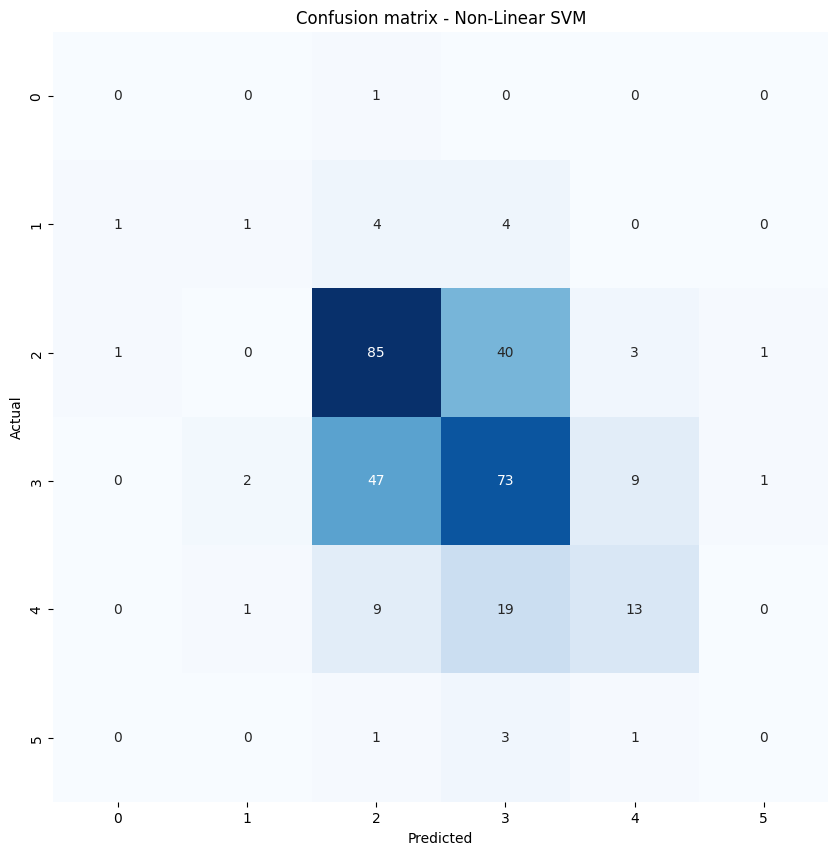

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Non-Linear SVM')
plt.show()

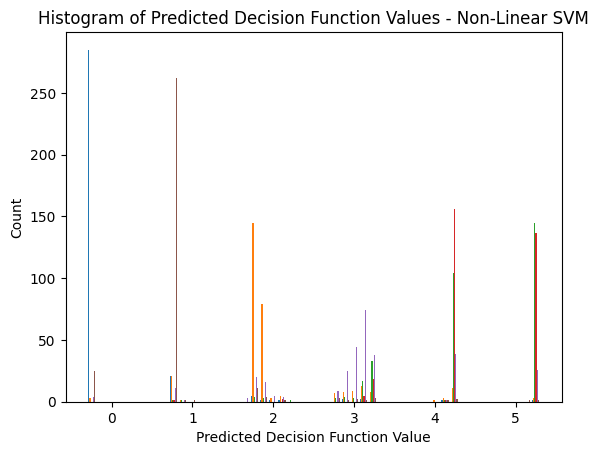

In [12]:
# Plot histogram of predicted class probabilities
proba = nonlinear_svm.decision_function(X_test)
plt.hist(proba, bins=50)
plt.xlabel('Predicted Decision Function Value')
plt.ylabel('Count')
plt.title('Histogram of Predicted Decision Function Values - Non-Linear SVM')
plt.show()